# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale/normalize the training data

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit the regression model

In [13]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 112, number of weight updates: 11089.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [14]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.94 -20.95 -32.35 -38.09], b:[363.16]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [25]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# print(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.18 485.88 389.65 492.04]
[295.18 485.88 389.65 492.04 419.89 222.86 522.75 267.98 683.38 181.87
 318.5  478.89 409.87 393.31 286.72 323.13 406.24 436.59 270.24 499.83
 328.5  388.29 549.83 241.36 295.81 282.42 217.66 490.73 228.45 341.9
 291.54 490.07 238.55 598.12 383.53 452.87 401.14 406.27 172.51 423.69
 434.54 277.22 228.45 448.37 488.96 332.3  465.46 221.86 386.76 456.4
 370.16 468.22 310.58 426.66 391.58 348.13 339.07 471.18 243.66 298.61
 273.02 249.94 298.32 334.71 376.27 288.91 228.45 620.5  352.51 510.78
 364.52 363.69 298.32 407.18 288.73 386.43 488.11 261.21 258.5  427.21
 238.53 356.21 340.25 390.1  382.12 220.65 434.54 243.64 465.46 185.88
 341.88 409.65 445.43 232.37 332.3  408.56 406.27 351.64 274.02]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

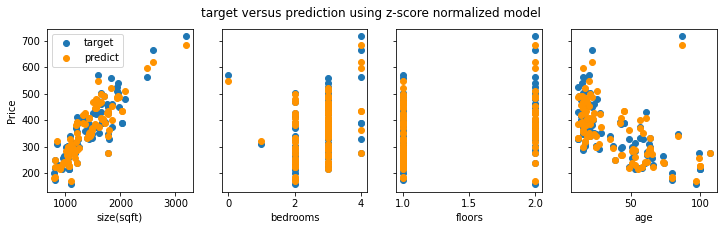

In [26]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit